In [4]:
import torch
from models.model import Informer, InformerStack, InformerStack_layerfeat
import argparse
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt

args = Namespace(activation='gelu', attn='full', batch_size=32, c_out=1, checkpoints='./checkpoints/', cols=None, d_ff=1024, d_layers=1, d_model=256, data='custom', dec_in=2, des='test', devices='0', distil=False, do_predict=False, dropout=0.05, e_layers=2, enc_in=2, factor=5, features='MS', gpu=0, inverse=False, itr=1, label_len=50, learning_rate=0.0001, loss='mse', lradj='type1', mix=True, model='informerstack', n_heads=8, num_workers=0, output_attention=True, padding=0, patience=10, pred_len=50, root_path='./data/', s_layers=[3, 2, 1], seq_len=512, target='OT', train_epochs=100, use_amp=False, use_gpu=True, use_multi_gpu=False)
device = torch.device("cuda")
model = InformerStack_layerfeat(
    args.enc_in,
    args.dec_in, 
    args.c_out, 
    args.seq_len, 
    args.label_len,
    args.pred_len, 
    args.factor,
    args.d_model, 
    args.n_heads, 
    args.s_layers,
    args.d_layers, 
    args.d_ff,
    args.dropout, 
    args.attn,
    args.activation,
    args.output_attention,
    args.distil,
    args.mix,
    device)
best_model_path = "checkpoints\informerstack_custom_ftMS_sl512_ll50_pl50_dm256_nh8_el2_dl1_df1024_atfull_fc5_dtFalse_mxTrue_test_0\checkpoint.pth"

model.load_state_dict(torch.load(best_model_path, weights_only=True))


<All keys matched successfully>

In [5]:
test_set = np.load("data/test_set.npz")
test_X, test_y = test_set['X'], test_set['y']

In [ ]:
print(test_X.shape, test_y.shape)

(346259, 512, 2) (346259, 50, 2)
0.0


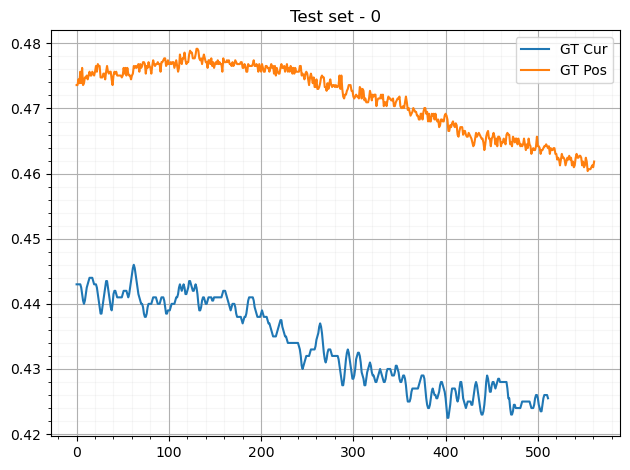

In [10]:
idx = 0
X = test_X[0]
y = test_y[0]

fig, ax = plt.subplots()
gt_cur = X[:, 0]
gt_pos = np.concatenate([X[:, 1], y[:,1]], axis=0)
ax.plot(np.arange(args.seq_len), gt_cur, label="GT Cur")
ax.plot(np.arange(args.seq_len + args.pred_len), gt_pos, label="GT Pos")
ax.legend()
ax.set_title(f"Test set - {idx}")
ax.grid(True)
ax.minorticks_on()
ax.grid(True, "minor", alpha=0.1)
fig.tight_layout()